# Building a model to predict the landmarks

Ensure that the input images are resized to to (256,320) before running this notebook. 
See the notebook called 'Resize images and annotations'

In [15]:
#load libraries and packages
from PIL import Image
from matplotlib.pyplot import imshow
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from skimage import color
from skimage import io

#get the list of all images in the folder
def get_imlist(path):
    return [os.path.join(f) for f in os.listdir(path) if f.endswith(".jpg")]

In [16]:
#Get a list of all images in the folder
im_list = get_imlist("C:\\Users\\mulanga.sinyosi\\Documents\\Masters\\PYTHON code\\Tse-tse fly data\\combined\\Resized")
len(im_list)

420

In [17]:
#get image annotations stored in an excel sheet
xl = pd.ExcelFile("C:\\Users\\mulanga.sinyosi\\Documents\\Masters\\PYTHON code\\Tse-tse fly data\\combined\\Resized\\annotations_right.xlsx")
df1 = xl.parse('annotations_right')
df1

,Image,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,x8,y8,x9,y9,x10,y10,x11,y11,Side,Code
0,A002 - 20170120_100720.jpg,265.043326,233.717799,548.322014,289.174473,1092.396956,493.015222,1173.333724,557.464871,617.268150,...,713.193208,644.396955,268.040984,413.577283,642.748244,436.059719,362.467213,368.612412,Right,0
1,A002 - 20170120_101302.jpg,283.029274,221.727166,585.792740,269.689696,1149.352459,467.535129,1228.790398,533.483607,644.247073,...,759.656909,624.912178,298.017564,407.581967,672.724824,406.083138,396.940281,355.122951,Right,0
2,A002 - 20170120_101816.jpg,341.483607,148.284543,585.792740,305.661593,1047.432084,702.851288,1108.884075,803.272834,626.261124,...,626.261124,708.846604,272.537471,325.146370,630.757611,485.521077,387.947307,322.148712,Right,0
3,A002 - 20170120_102849.jpg,390.944965,142.289227,644.247073,323.647541,1089.399297,746.317330,1138.860656,840.743560,662.233021,...,653.240047,723.834895,313.005855,326.645199,677.221311,505.005855,432.912178,320.649883,Right,0
4,A002 - 20170120_103327.jpg,286.026932,190.251756,569.305621,311.656909,1072.912178,632.406323,1150.851288,722.336066,609.774005,...,650.242389,699.853630,247.057377,376.106557,624.762295,473.530445,371.460187,355.122951,Right,0
5,A002 - 20170120_104153.jpg,321.998829,226.223653,596.284543,346.129977,1108.884075,693.858314,1177.830211,779.291569,648.743560,...,684.715457,750.813817,277.033958,407.581967,665.230679,513.998829,395.441452,392.593677,Right,0
6,A002 - 20170120_111537.jpg,230.570258,190.251756,518.345433,308.659251,1041.436768,633.905152,1105.886417,719.338407,555.816159,...,614.270492,711.844262,194.598361,380.603045,575.300937,472.031616,310.008197,349.127635,Right,0
7,A002 - 20170120_112159.jpg,311.507026,247.207260,596.284543,361.118267,1111.881733,678.870023,1176.331382,755.310304,639.750585,...,689.211944,744.818501,280.031616,431.563232,656.237705,522.991803,393.942623,404.584309,Right,0
8,A002 - 20170120_112438.jpg,271.038642,203.741218,564.809133,296.668618,1101.389930,582.944965,1182.326698,660.884075,626.261124,...,698.204918,698.354801,256.050351,391.094848,645.745902,461.539813,368.462529,358.120609,Right,0
9,A002 - 20170120_113625.jpg,262.045667,313.155738,548.322014,391.094848,1081.905152,668.378220,1156.846604,746.317330,611.272834,...,681.717799,776.293911,250.055035,503.507026,632.256440,551.469555,357.970726,463.038642,Right,0


In [18]:
#create variables for the image names and their annotations
image = df1['Image']
x1 = df1['x1']/4
x2 = df1['x2']/4
x3 = df1['x3']/4 
x4 = df1['x4']/4 
x5 = df1['x5']/4 
x6 = df1['x6']/4 
x7 = df1['x7']/4
x8 = df1['x8']/4
x9 = df1['x9']/4 
x10 = df1['x10']/4
#x11 = df1['x11']
y1 = df1['y1']/4
y2 = df1['y2']/4
y3 = df1['y3']/4
y4 = df1['y4']/4
y5 = df1['y5']/4
y6 = df1['y6']/4
y7 = df1['y7']/4 
y8 = df1['y8']/4
y9 = df1['y9']/4
y10 = df1['y10']/4
#y11 = df1['y11']

Text(0.5,1,'A002 - 20170120_100720.jpg')

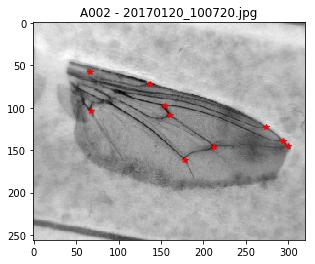

In [19]:
### Example image with annotations
from pylab import *

i=0

# read image to array
im = array(Image.open(image[i]))

# plot the image
imshow(im)# plot the image

# some points
x = [x1[i],x2[i],x3[i],x4[i],x5[i],x6[i],x7[i],x8[i],x9[i],x10[i]]
y = [y1[i],y2[i],y3[i],y4[i],y5[i],y6[i],y7[i],y8[i],y9[i],y10[i]]

# plot the points with red star-markers
plot(x,y,"r*")

title(image[i])

# Simple Feed Foward Network

Train and validation data preprocessing

In [7]:
x1 =[0 for a in range(3000000)]
for i in range(200):
    x1[i]=array(color.rgb2gray(io.imread(image[i])))

In [8]:
x1[3].shape

(256, 320)

In [9]:
xx1 = x1[0:200]; xx1

[array([[0.85882353, 0.8627451 , 0.8745098 , ..., 0.38431373, 0.36862745,
         0.38039216],
        [0.85882353, 0.8627451 , 0.82745098, ..., 0.41176471, 0.41960784,
         0.44313725],
        [0.85098039, 0.86666667, 0.85882353, ..., 0.44705882, 0.48627451,
         0.53333333],
        ...,
        [0.80784314, 0.78431373, 0.80392157, ..., 0.70196078, 0.70588235,
         0.70588235],
        [0.80392157, 0.78823529, 0.78823529, ..., 0.70196078, 0.70588235,
         0.70196078],
        [0.80784314, 0.78431373, 0.78823529, ..., 0.69411765, 0.70196078,
         0.69411765]]),
 array([[0.80392157, 0.80392157, 0.78039216, ..., 0.83137255, 0.82745098,
         0.80784314],
        [0.81960784, 0.85098039, 0.80392157, ..., 0.83529412, 0.83529412,
         0.81568627],
        [0.83529412, 0.83137255, 0.85098039, ..., 0.83137255, 0.83137255,
         0.81176471],
        ...,
        [0.64313725, 0.62745098, 0.62745098, ..., 0.78039216, 0.78039216,
         0.76862745],
        [0.6

In [10]:
for i in range(200):
    xx1[i]=np.reshape(x1[i],(81920))
xx1[0].shape

(81920,)

In [11]:
X1 = np.vstack(xx1)/1. 
X1 = X1.astype(np.float32)
X1.shape

(200, 81920)

In [12]:
y1 = df1[df1.columns[1:21]].values/4
y1 = (y1 - 160)/160  # scale target coordinates to [-1, 1]
y1 = y1.astype(np.float32)
y1 = y1[0:200]

In [13]:
print("X.shape == {}; X.min == {:.3f}; X.max == {:.3f}".format(
    X1.shape, X1.min(), X1.max()))
print("y.shape == {}; y.min == {:.3f}; y.max == {:.3f}".format(
    y1.shape, y1.min(), y1.max()))

X.shape == (200, 81920); X.min == 0.000; X.max == 1.000
y.shape == (200, 20); y.min == -0.803; y.max == 0.993


Model Building and training


In [14]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(100, input_dim=(81920)))
model.add(Activation('relu'))
model.add(Dense(20))

sgd = SGD(lr=0.0001, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)
hist = model.fit(X1, y1, epochs=100, validation_split=0.2)

C:\Users\mulanga.sinyosi\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Train on 160 samples, validate on 40 samples
Epoch 1/100
160/160 [==============================] - 3s 17ms/step - loss: 0.1671 - val_loss: 0.0679
Epoch 2/100
160/160 [==============================] - 1s 9ms/step - loss: 0.0429 - val_loss: 0.0388
Epoch 3/100
160/160 [==============================] - 2s 9ms/step - loss: 0.0308 - val_loss: 0.0319
Epoch 4/100
160/160 [==============================] - 1s 9ms/step - loss: 0.0250 - val_loss: 0.0282
Epoch 5/100
160/160 [==============================] - 1s 8ms/step - loss: 0.0230 - val_loss: 0.0263
Epoch 6/100
160/160 [==============================] - 2s 14ms/step - loss: 0.0218 - val_loss: 0.0250
Epoch 7/100
160/160 [==============================] - 2s 11ms/step - loss: 0.0210 - val_loss: 0.0241
Epoch 8/100
160/160 [==============================] - 2s 10ms/step - loss: 0.0205 - val_loss: 0.0237
Epoch 9/100
160/160 [==============================] - 2s 9ms/step - loss: 0.0201 - val_loss: 0.0229
Epoch 10/100
160/160 [====================

In [14]:
plt.plot(hist.history['loss'], linewidth=3, label='train')
plt.plot(hist.history['val_loss'], linewidth=3, label='valid')
plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.ylim(7e-3, 3e-2)
plt.yscale('log')
plt.show()

AttributeError: 'function' object has no attribute 'history'

Test set preprocessing

In [17]:
t1 =[0 for a in range(3000000)]
for i in range(0,20):
    t1[i]=array(color.rgb2gray(io.imread(image[i + 200])))

In [18]:
t1[0].shape

(256, 320)

In [19]:
tt1 = t1[0:20]
for i in range(20):
    tt1[i]=np.reshape(t1[i],(81920))
tt1[0].shape

(81920,)

In [20]:
T1 = np.vstack(tt1)/1.  # scale pixel values to [0, 1]
T1 = T1.astype(np.float32)
T1[0].shape

(81920,)

Test set performance visualisation

In [21]:
def plot_sample(x, y, axis):
    img = x.reshape(256, 320) 
    axis.imshow(img, cmap='gray') 

    axis.scatter(y[0::2] * 160 + 160, y[1::2] * 160 + 160, marker='x', s=10)

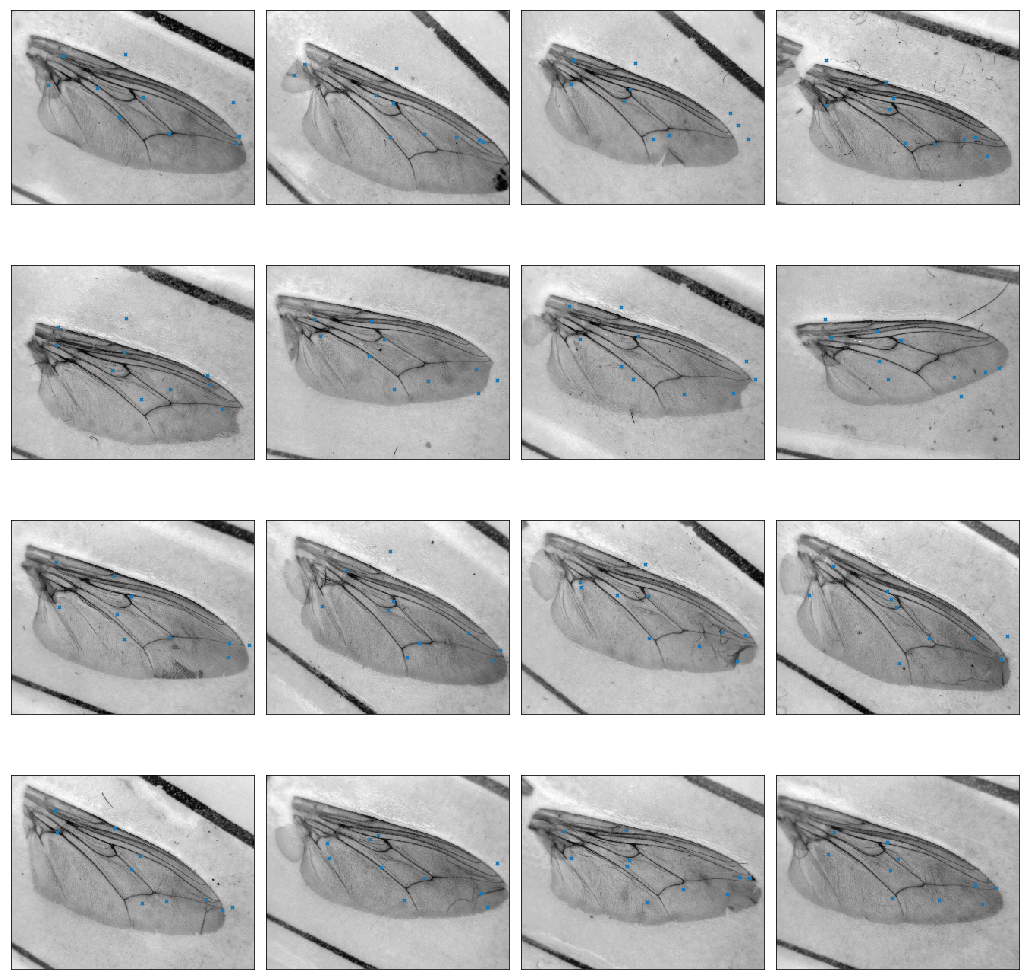

In [22]:
from matplotlib import pyplot


y_test = model.predict(T1)

fig = pyplot.figure(figsize=(14, 14))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(16):
    axis = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
    plot_sample(T1[i], y_test[i], axis)

pyplot.show()

# Convolutions

Data preprocessing

In [23]:
X2=X1.reshape(-1,320,256,1)
y2=y1

In [24]:
X2.shape

(200, 320, 256, 1)

Model Build

In [25]:
from keras.layers import Conv2D, MaxPooling2D,Flatten, Dropout

def SimpleCNN(withDropout=False):
    '''
    WithDropout: If True, then dropout regularlization is added.
    This feature is experimented later.
    '''
    model = Sequential()
    model.add(Conv2D(32,(3, 3), input_shape = (320, 256, 1)))
    model.add(Activation('relu')) 
    model.add(MaxPooling2D(pool_size = (2,2)))
    if withDropout:
        model.add(Dropout(0.1))
        
    model.add(Conv2D(64,(2,2)))
    model.add(Activation('relu')) ## 
    model.add(MaxPooling2D(pool_size = (2,2)))
    if withDropout:
        model.add(Dropout(0.1))
    
    model.add(Conv2D(128,(2,2)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    if withDropout:
        model.add(Dropout(0.1))
        
    model.add(Flatten())
    
    model.add(Dense(500))
    model.add(Activation('relu'))
    if withDropout:
        model.add(Dropout(0.1))
        
    model.add(Dense(500))
    model.add(Activation('relu'))
    if withDropout:
        model.add(Dropout(0.1))
        
    model.add(Dense(20))
    sgd = SGD(lr=0.001,momentum = 0.9,nesterov=True)
    model.compile(loss="mean_squared_error",optimizer=sgd)
    return(model)

In [26]:
%%time
model2 = SimpleCNN()

Wall time: 1.13 s


In [ ]:
hist2 = model2.fit(X2,y2,epochs=500,validation_split=0.2)